In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/scratch/user/xiliangdiao/LR-PSL/Sunway_LR_0001020100Z_0501010100Z.nc')

In [3]:
PSL = data.variables['PSL'][2025,:,:]

In [4]:
lon = data.variables['lon']

In [5]:
lat = data.variables['lat']

In [6]:
lont, latt = np.meshgrid(lon, lat)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'spacing'


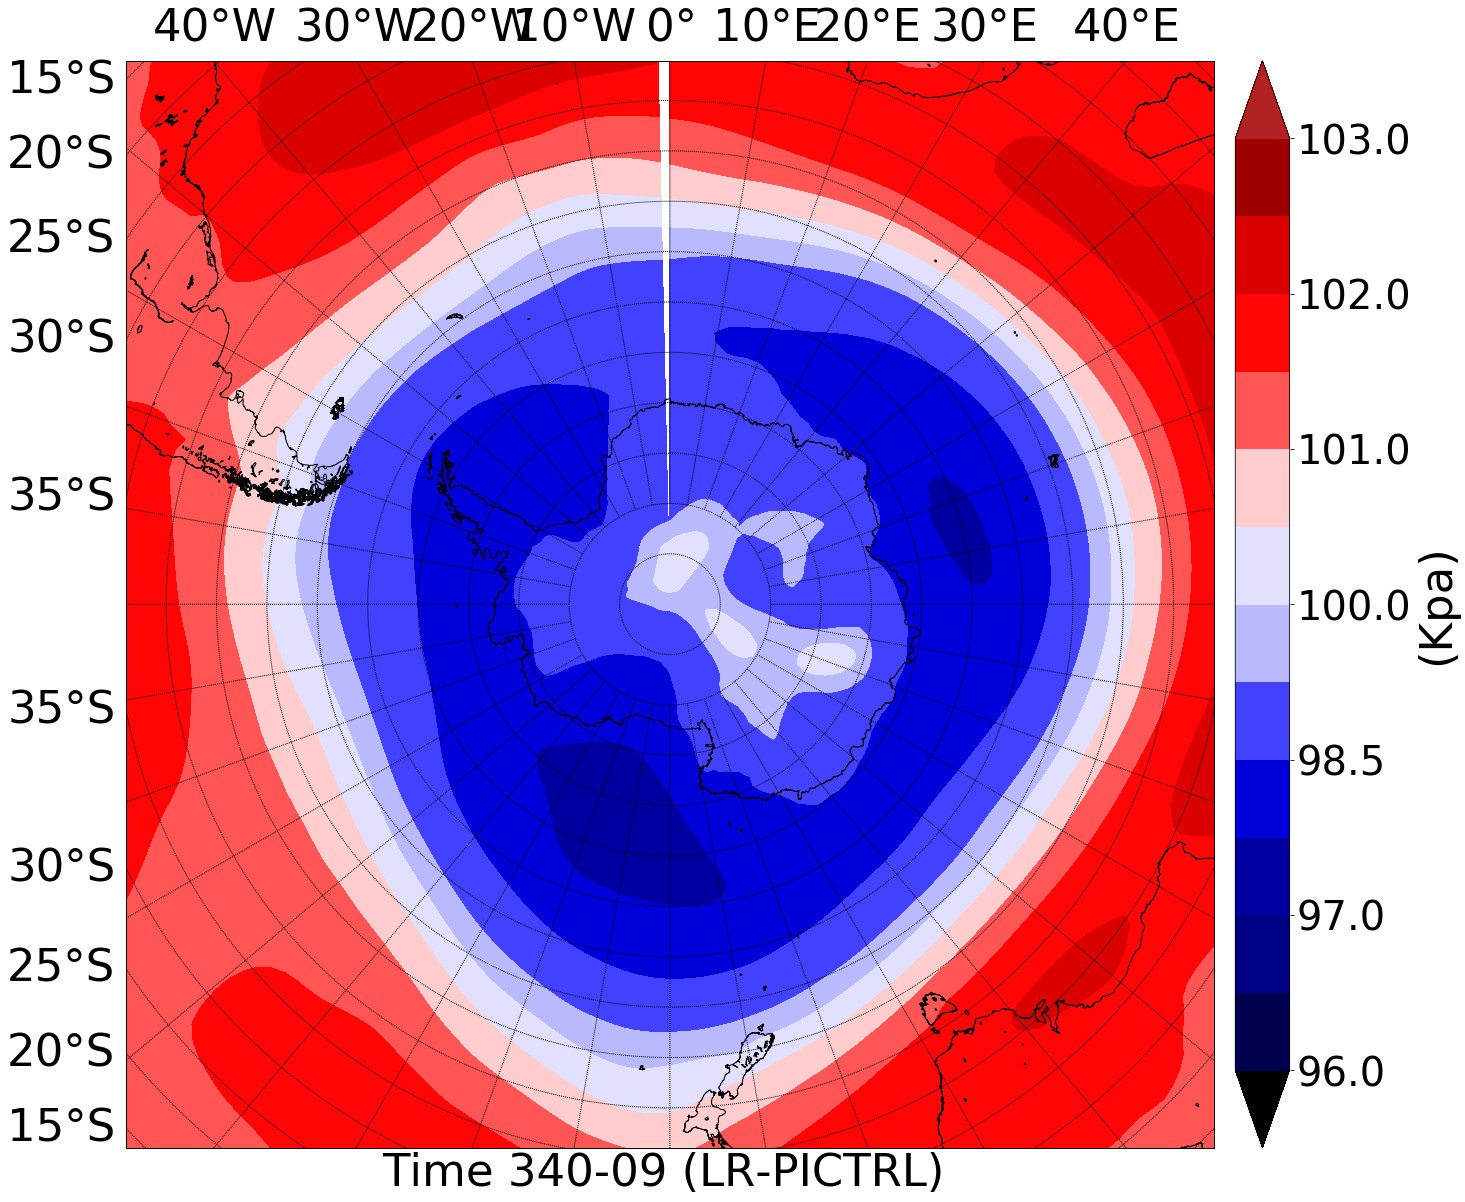

In [8]:
nice_cmap=plt.get_cmap('seismic')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,40,50,60,70,80,100,110,120,140,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([1,30,50,70,100,130,140,150,160,170,180,190,210,230,240])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"seismic")
nice_levels2 = [2000,2500,3000,3500,4000]
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [96,96.5,97,97.5,98.5,99.5,100,100.5,101,101.5,102,102.5,103]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 12000000,height = 12000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
#map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
CP = map.contourf(x,y,PSL/1000,levels = nice_levels,cmap = new_cmap,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('black')

#xq,yq=map(lontu,lattu)
  
#CS = map.contour(xq,yq,plotvarKMT,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
#plt.clabel(CS,fontsize=12,fmt='%4d')
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')#,ticks= nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=40) 
cbar.set_label('(Kpa)', **my_font)
plt.xlabel("Time 340-09 (LR-PICTRL) ",**my_font)
plt.savefig("LR888.png",bbox_inches='tight')